In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Importing tsla data
tsla = yf.download(['TSLA'],
                      start='2011-01-01',
                      end='2022-03-16',  
                      progress=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Creating DataFrame and rounding numbers

tsla = pd.DataFrame(tsla).round(2)
tsla = tsla.drop(columns='Adj Close')

# Adding % change column, seperating date, reseting index

tsla['Change'] = ((tsla['Close'] - tsla['Open'])/tsla['Open'])*100
tsla['Up_day'] = np.where((tsla['Close'] - tsla['Open']) >0,1,0)
tsla['Date'] = tsla.index
tsla = tsla.reset_index(drop=True)

In [4]:
tsla

Open    High     Low   Close    Volume    Change  Up_day       Date
0       5.31    5.45    5.30    5.33   7089500  0.376648       1 2010-12-31
1       5.37    5.40    5.18    5.32   6415000 -0.931099       0 2011-01-03
2       5.33    5.39    5.20    5.33   5937000  0.000000       0 2011-01-04
3       5.30    5.38    5.24    5.37   7233500  1.320755       1 2011-01-05
4       5.37    5.60    5.36    5.58  10306000  3.910615       1 2011-01-06
...      ...     ...     ...     ...       ...       ...     ...        ...
2815  839.48  860.56  832.01  858.97  19728000  2.321675       1 2022-03-09
2816  851.45  854.45  810.36  838.30  19549500 -1.544424       0 2022-03-10
2817  840.20  843.80  793.77  795.35  22272800 -5.338015       0 2022-03-11
2818  780.61  800.70  756.04  766.37  23717400 -1.824214       0 2022-03-14
2819  775.27  805.57  756.57  801.89  22280400  3.433642       1 2022-03-15

[2820 rows x 8 columns]

Text(0.5, 0, 'Date')

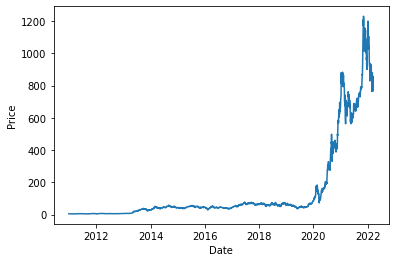

In [5]:
plt.plot(tsla['Date'],tsla['Close'])
plt.ylabel('Price')
plt.xlabel('Date')

In [6]:
%matplotlib inline

plt.subplots(tsla)

ValueError: Number of rows must be a positive integer, not         Open    High     Low   Close    Volume    Change  Up_day       Date
0       5.31    5.45    5.30    5.33   7089500  0.376648       1 2010-12-31
1       5.37    5.40    5.18    5.32   6415000 -0.931099       0 2011-01-03
2       5.33    5.39    5.20    5.33   5937000  0.000000       0 2011-01-04
3       5.30    5.38    5.24    5.37   7233500  1.320755       1 2011-01-05
4       5.37    5.60    5.36    5.58  10306000  3.910615       1 2011-01-06
...      ...     ...     ...     ...       ...       ...     ...        ...
2815  839.48  860.56  832.01  858.97  19728000  2.321675       1 2022-03-09
2816  851.45  854.45  810.36  838.30  19549500 -1.544424       0 2022-03-10
2817  840.20  843.80  793.77  795.35  22272800 -5.338015       0 2022-03-11
2818  780.61  800.70  756.04  766.37  23717400 -1.824214       0 2022-03-14
2819  775.27  805.57  756.57  801.89  22280400  3.433642       1 2022-03-15

[2820 rows x 8 columns]

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 5), range(4, -3, -1))
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_data, train_labels)

In [ ]:
model.coef_

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


In [ ]:
xs, ys = get_grid(train_data)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

In [ ]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [ ]:
X, y, classes = prepare_dataset('diabetes')

In [ ]:
X.describe()

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30)
model.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.values)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [ ]:
cm_train

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

In [ ]:
print(f1_score(y_test, y_pred, average="micro"))
print(f1_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="weighted"))
print(f1_score(y_test, y_pred, average="binary", pos_label=0))

In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

In [ ]:
df

In [ ]:
sns.barplot(x='metric', y='value', hue='index', data=melted)

In [ ]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
X.head()

In [ ]:
y.value_counts()

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
classes

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.to_numpy())

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='micro')
recall_test = recall_score(y_test, y_pred, average='micro')
f1_test = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

In [ ]:
sns.barplot(x='metric', y='value', hue='index', data=melted)